# analysis of CCQE topology events from myVertex

In [1]:
import sys; sys.path.insert(0, '../../../AnaTreesPackage/notebooks')
from notebooks_tools import * 
from matplotlib import ticker
import scipy.optimize as optimize
%matplotlib inline

# samples of 2-tracks clusters

In [9]:
MCBNBextBNB = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC8_MC_BNB_extBNB.csv')

In [10]:
len(MCBNBextBNB)

65755

In [11]:
print len(MCBNBextBNB),'2-tracks clusters from MC-BNB events'
TrueCC1p = MCBNBextBNB[MCBNBextBNB.GENIECC1p==1]
print len(TrueCC1p), 'are true (GENIE) cc1p'

# MCeventsNonTrueCC1p = MCBNBextBNB[MCBNBextBNB.GENIECC1p!=1]
# print len(MCeventsNonTrueCC1p), 'are non true (GENIE) cc1p'
CC1pDetected = MCBNBextBNB[(MCBNBextBNB.Is1mu1p==True) & (MCBNBextBNB.GENIECC1p==False)]
print len(CC1pDetected), 'are 2-tracks clusters of 1µ1p'
NonCC1p = MCBNBextBNB[MCBNBextBNB.Is1mu1p==False]
print len(NonCC1p), 'are 2-tracks not 1µ1p'
# print len(MCeventsNonTrueCC1p1mu1p) +  len(MCeventsNon1mu1p), ' 1µ1p and not 1µ1p together'
# extBNB2tracks = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC7_extBNB.csv')

# print len(extBNB2tracks),'extBNB 2-tracks clusters'
# OpenCosmic2tracks = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC7_openCOSMIC_MC.csv')
# print len(OpenCosmic2tracks),'OpenCosmic 2-tracks clusters'

samples = [TrueCC1p , CC1pDetected, NonCC1p ]#, extBNB2tracks, OpenCosmic2tracks]
labels = ['true CC1p' , '1$\\mu$1p non CC1p' , 'non 1$\\mu$1p' ]#, 'ext-BNB 2-tracks clusters', 'open-cosmic MC']

65755 2-tracks clusters from MC-BNB events
1774 are true (GENIE) cc1p
4258 are 2-tracks clusters of 1µ1p
61497 are 2-tracks not 1µ1p


# Enhance contribtion from true CC1p pairs while suppresing non-CC1p reconstructed pairs as well as cosmic background ?
We should look at all possible features of 2-tracks clusters and try to find 'money' cuts that kill background. Then, we can later on take care of maximizing efficiency and purity 

In [12]:
def plot_feature_2tracks_clusters(var='l_long',
                                  x_label='$l_{long}$ [cm]',mul=1,
                                  bins=np.linspace(0,300,100),
                                  fig=None,do_add_legend=False,
                                  Nh=2,Nw=2,i=1):
    ax = fig.add_subplot(Nh,Nw,i)
    bins=bins
    for sample,label in zip(samples,labels):
        plt.hist(mul*sample[var],normed=1,label=label,bins=bins,histtype='step',linewidth=3)
    if do_add_legend:
        ax.legend(fontsize=15)
    set_axes(ax,x_label=x_label)

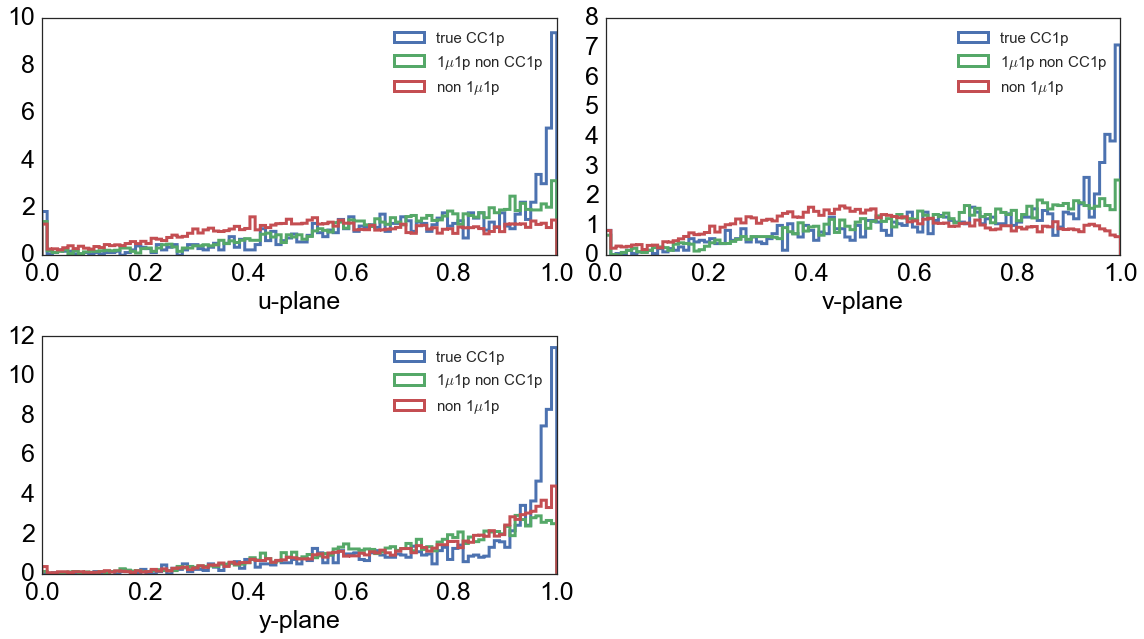

In [13]:
fig=plt.figure(figsize=(16,9))
plot_feature_2tracks_clusters(i=1,var='ratio_associated_hit_charge_to_total_u',x_label='u-plane',bins=np.linspace(0,1,100),do_add_legend=True,fig=fig)
plot_feature_2tracks_clusters(i=2,var='ratio_associated_hit_charge_to_total_v',x_label='v-plane',bins=np.linspace(0,1,100),do_add_legend=True,fig=fig)
plot_feature_2tracks_clusters(i=3,var='ratio_associated_hit_charge_to_total_y',x_label='y-plane',bins=np.linspace(0,1,100),do_add_legend=True,fig=fig)
plt.tight_layout()

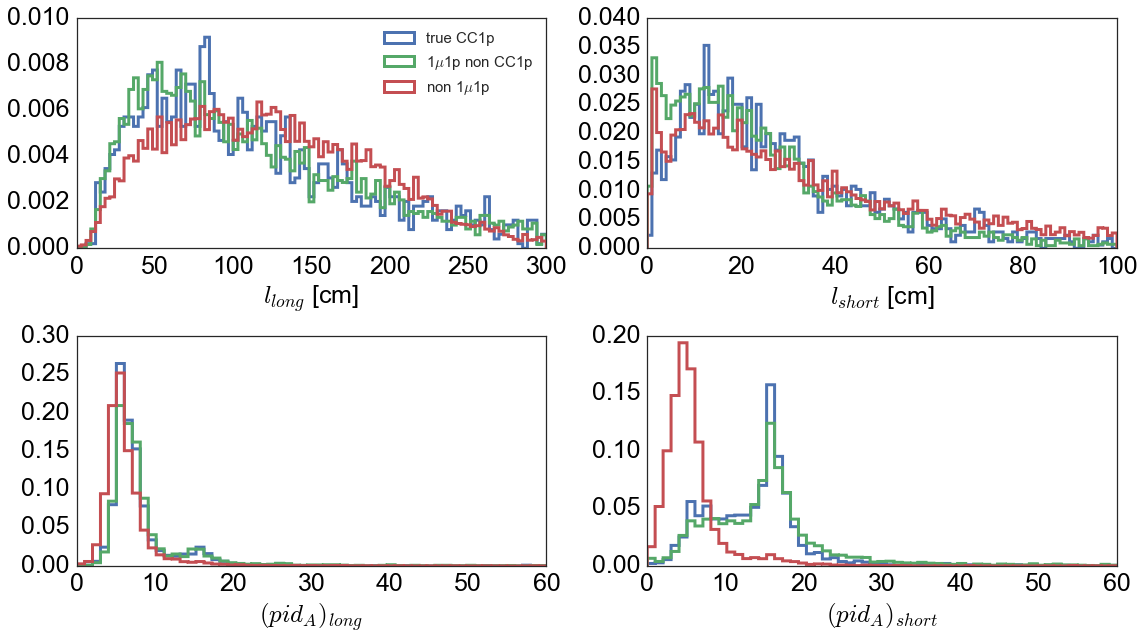

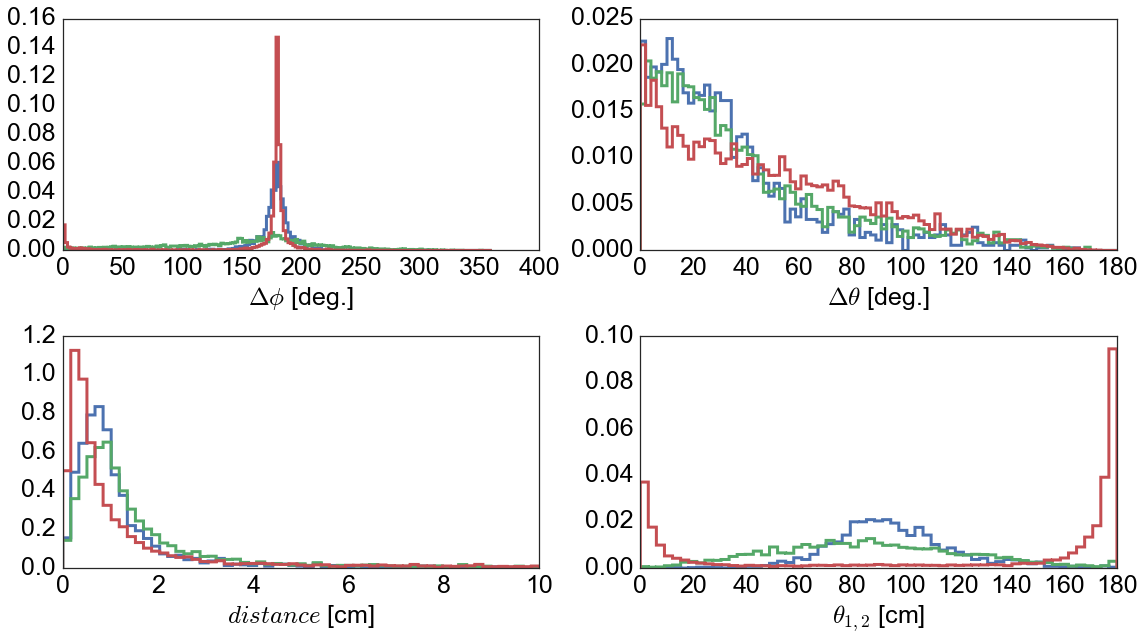

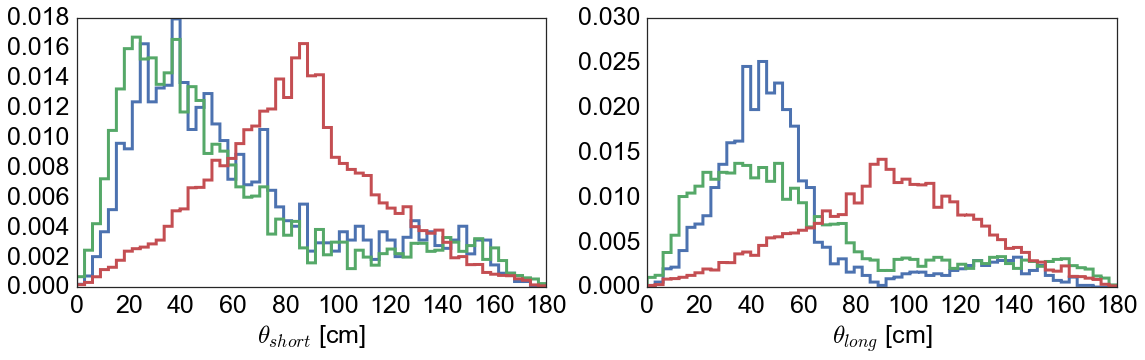

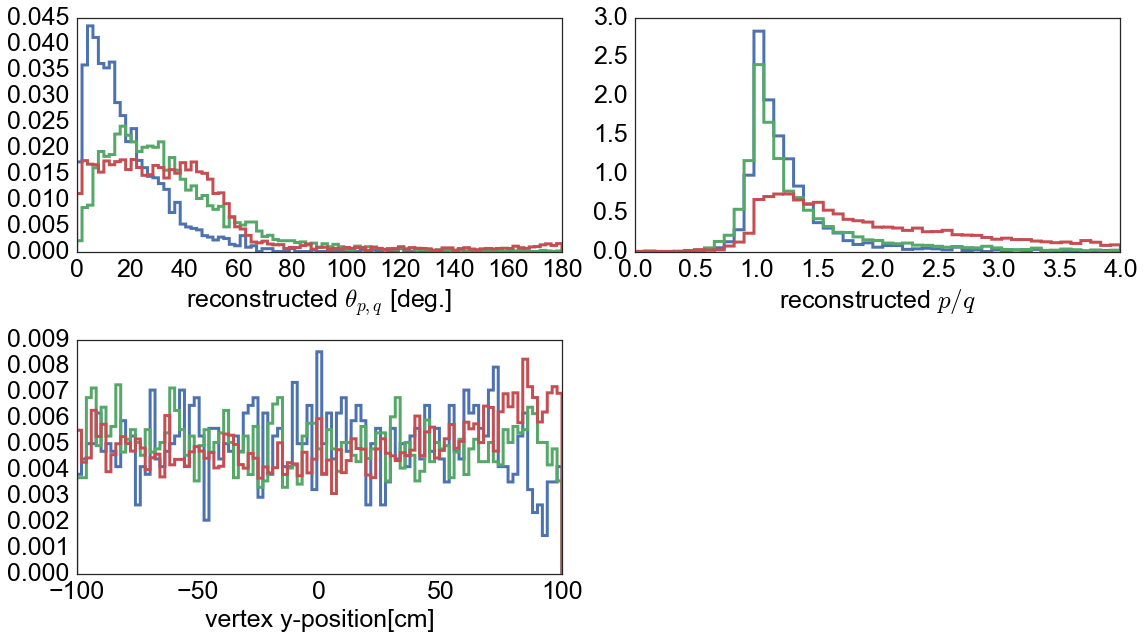

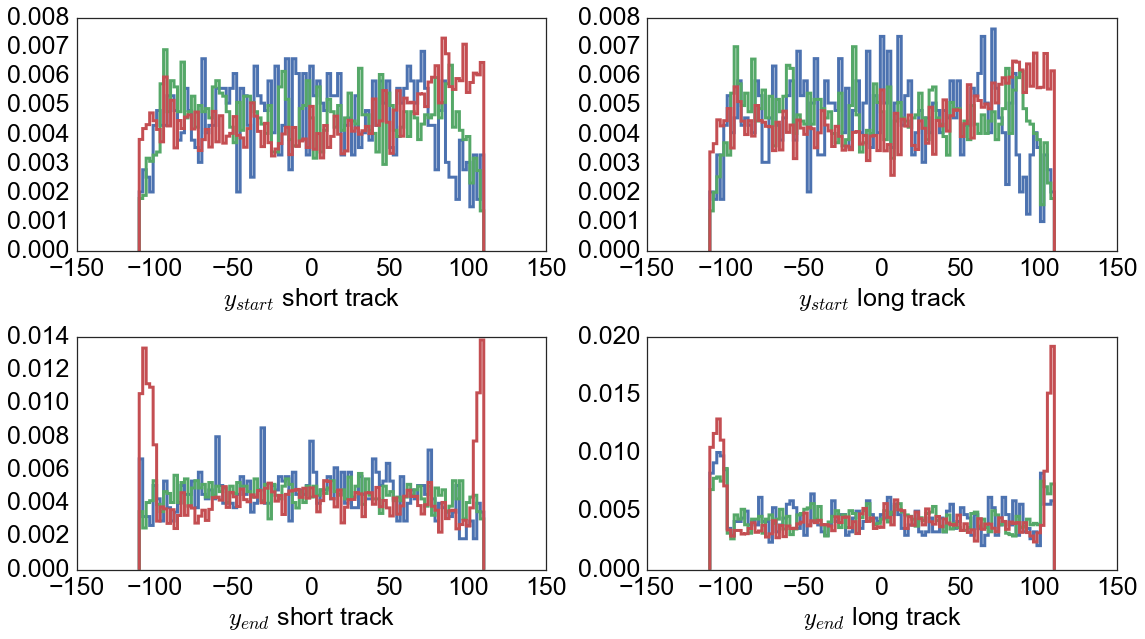

In [17]:
fig=plt.figure(figsize=(16,9))
plot_feature_2tracks_clusters(i=1,var='l_long',x_label='$l_{long}$ [cm]',bins=np.linspace(0,300,100),do_add_legend=True,fig=fig)
plot_feature_2tracks_clusters(i=2,var='l_short',x_label='$l_{short}$ [cm]',bins=np.linspace(0,100,100),fig=fig)
plot_feature_2tracks_clusters(i=3,var='PIDA_long',x_label='$(pid_A)_{long}$',bins=np.linspace(0,60,60),fig=fig)
plot_feature_2tracks_clusters(i=4,var='PIDA_short',x_label='$(pid_A)_{short}$',bins=np.linspace(0,60,60),fig=fig)
plt.tight_layout()

fig=plt.figure(figsize=(16,9))
plot_feature_2tracks_clusters(i=1,var='delta_phi',x_label='$\\Delta \\phi$ [deg.]',bins=np.linspace(0,360,180),fig=fig)
plot_feature_2tracks_clusters(i=2,var='delta_theta',x_label='$\\Delta \\theta$ [deg.]',bins=np.linspace(0,180,90),fig=fig)
plot_feature_2tracks_clusters(i=3,var='distance',x_label='$distance$ [cm]',bins=np.linspace(0,10,60),fig=fig)
plot_feature_2tracks_clusters(i=4,var='2_tracks_angle',x_label='$\\theta_{1,2}$ [cm]',mul=180./np.pi,bins=np.linspace(0,180,60),fig=fig)
plt.tight_layout()


fig=plt.figure(figsize=(16,9))
plot_feature_2tracks_clusters(i=1,var='theta_long',x_label='$\\theta_{short}$ [cm]',mul=180./np.pi,bins=np.linspace(0,180,60),fig=fig)
plot_feature_2tracks_clusters(i=2,var='theta_short',x_label='$\\theta_{long}$ [cm]',mul=180./np.pi,bins=np.linspace(0,180,60),fig=fig)
# plot_feature_2tracks_clusters(i=3,var='cfdistance_small_pida',x_label='closest flash distance small-pid-A',bins=np.linspace(-100,100,100),fig=fig)
plt.tight_layout()


fig=plt.figure(figsize=(16,9))
plot_feature_2tracks_clusters(i=1,var='reco_CC1p_theta_pq',x_label='reconstructed $\\theta_{p,q}$ [deg.]',bins=np.linspace(0,180,90),fig=fig)
plot_feature_2tracks_clusters(i=2,var='reco_CC1p_p_over_q',x_label='reconstructed $p/q$',bins=np.linspace(0,4,50),fig=fig)
plot_feature_2tracks_clusters(i=3,var='vertex_y',x_label='vertex y-position[cm]',bins=np.linspace(-100,100,100),fig=fig)
# plot_feature_2tracks_clusters(i=4,var='cfdistance_large_pida',x_label='closest flash distance large-pid-A',bins=np.linspace(-100,100,100),fig=fig)
plt.tight_layout()

fig=plt.figure(figsize=(16,9))
plot_feature_2tracks_clusters(i=1,var='starty_short',x_label='$y_{start}$ short track',bins=np.linspace(-110,110,100),fig=fig)
plot_feature_2tracks_clusters(i=2,var='starty_long',x_label='$y_{start}$ long track',bins=np.linspace(-110,110,100),fig=fig)
plot_feature_2tracks_clusters(i=3,var='endy_short',x_label='$y_{end}$ short track',bins=np.linspace(-110,110,100),fig=fig)
plot_feature_2tracks_clusters(i=4,var='endy_long',x_label='$y_{end}$ long track',bins=np.linspace(-110,110,100),fig=fig)
plt.tight_layout()

# efficiency and purity for all cuts in 1d

In [18]:
def get_fraction_in_cut( data=None , cut_var='distance', mul=1 , xmin=0.1, xmax=10 , Nbins=10 ,  cut_type= 'max' ):
    x_array = np.linspace(xmin,xmax,Nbins)
    frac , frac_err = [] , []
    denominator = len(data)
    
    for x in x_array:
        if cut_type is 'max':
            reduced = data[mul*data[cut_var]<x]
        elif cut_type is 'min':
            reduced = data[mul*data[cut_var]>x]
        numerator = float(len(reduced))
         
        frac.append(100 * numerator / denominator)
        frac_err.append( frac[-1] * np.sqrt(1./numerator + 1./denominator) ) if numerator>0 else frac_err.append( frac[-1]/np.sqrt(denominator) )
        
    return np.array(x_array), np.array(frac) , np.array(frac_err)

In [19]:
def get_fraction_in_symmetriccut( data=None , cut_var='delta_phi', mul=1,xcenter=0.1, delta_x_min=0, delta_x_max=100 , Nbins=10 ):
    delta_x_array = np.linspace(delta_x_min,delta_x_max,Nbins)
    frac , frac_err = [] , []
    denominator = len(data)
    
    for delta_x in delta_x_array:
        reduced = data[np.abs(mul*data[cut_var]-xcenter)<delta_x]
        numerator = float(len(reduced))         
        frac.append(100 * numerator / denominator)
        frac_err.append( frac[-1] * np.sqrt(1./numerator + 1./denominator) ) if numerator>0 else frac_err.append( frac[-1]/np.sqrt(denominator) )
        
    return np.array(delta_x_array), np.array(frac) , np.array(frac_err)

In [20]:
def plot_cut_samples (cut_name='maximal distance between tracks',mul=1,
                      cut_var ='distance',
                      cut_type= 'max',
                      x_label = 'maximal tracks distance [cm]',
                      xcenter=0,figsize=(10,10),
                      xmin=0.1, xmax=10 , Nbins=10, do_add_legend=True):
    fig,ax=plt.subplots(figsize=figsize)
    for sample,label in zip(samples,labels):
        if cut_type=='max' or cut_type=='min':
            x , frac , frac_eff = get_fraction_in_cut( data=sample , cut_var=cut_var , mul=mul , cut_type=cut_type , xmin=xmin, xmax=xmax , Nbins=Nbins )
        elif cut_type=='symmetric':
            x , frac , frac_eff = get_fraction_in_symmetriccut( data=sample , cut_var=cut_var , mul=mul , xcenter=xcenter, delta_x_min=xmin, delta_x_max=xmax , Nbins=Nbins )
        plt.errorbar(x , y=frac, yerr=frac_eff , fmt='o' , label=label)
    if do_add_legend:
        ax.legend(fontsize=25,loc='best')
    ax.set_ylim(0,105)
    set_axes(ax,x_label=x_label,y_label='% of the original sample')

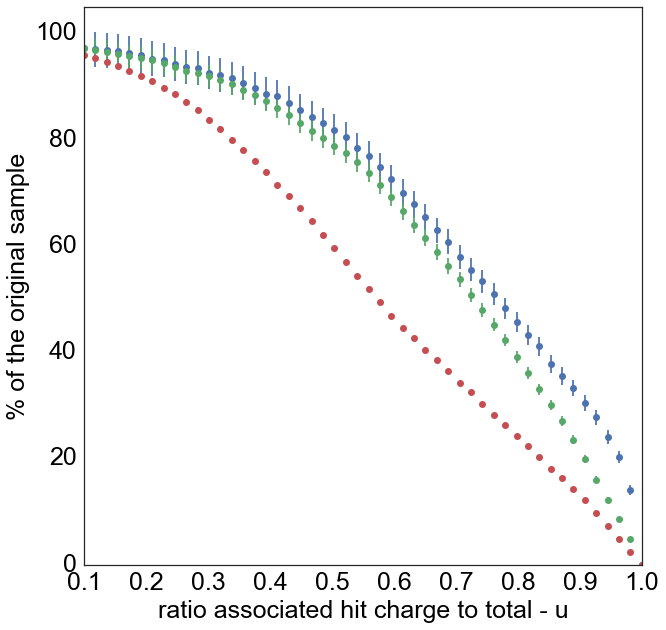

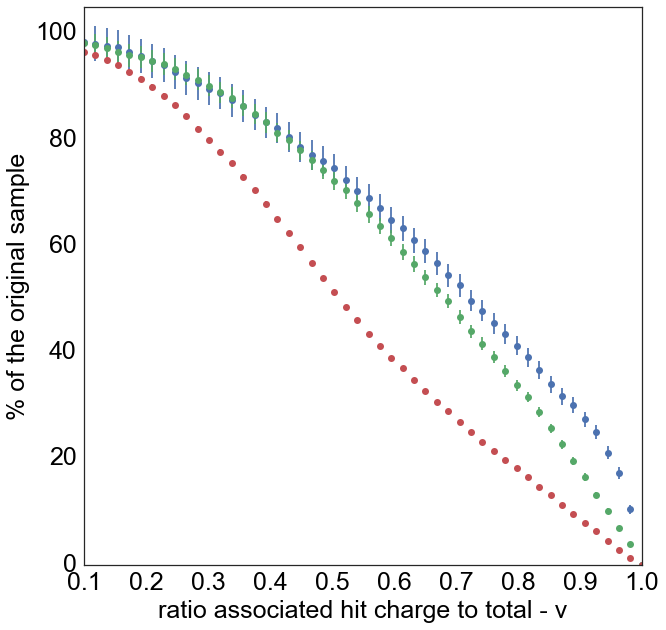

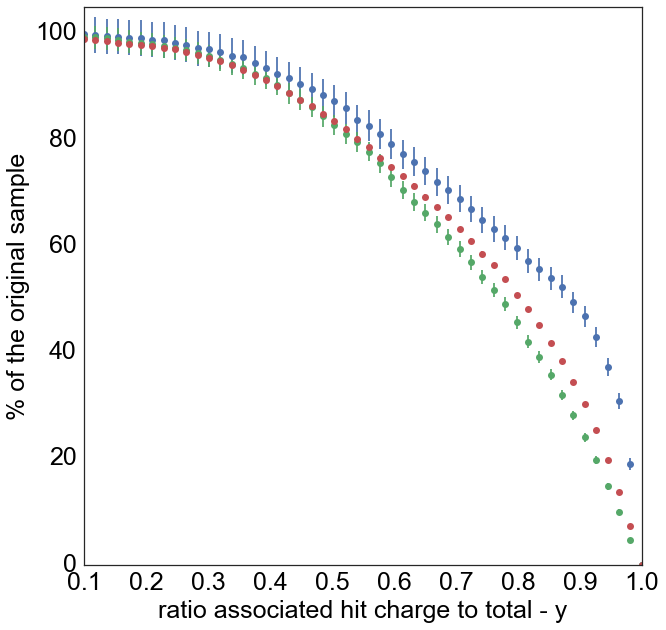

In [29]:
plot_cut_samples(cut_var ='ratio_associated_hit_charge_to_total_u', do_add_legend=False,               
                 cut_type= 'min',
                 x_label = 'ratio associated hit charge to total - u',                 
                 xmin=0.1, xmax=1 , Nbins=50)
plot_cut_samples(cut_var ='ratio_associated_hit_charge_to_total_v', do_add_legend=False,               
                 cut_type= 'min',
                 x_label = 'ratio associated hit charge to total - v',                 
                 xmin=0.1, xmax=1 , Nbins=50)
plot_cut_samples(cut_var ='ratio_associated_hit_charge_to_total_y', do_add_legend=False,               
                 cut_type= 'min',
                 x_label = 'ratio associated hit charge to total - y',                 
                 xmin=0.1, xmax=1 , Nbins=50)

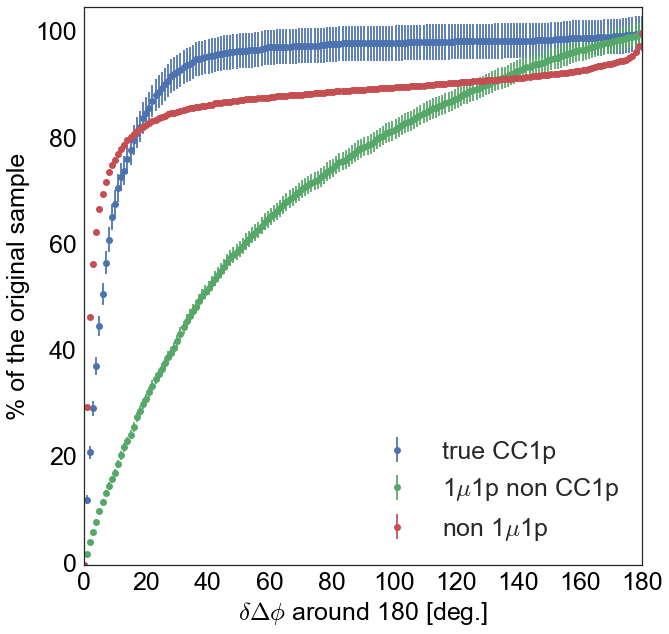

In [22]:
plot_cut_samples(cut_var ='delta_phi',                
                 cut_type= 'symmetric',
                 x_label = '$\\delta \\Delta \\phi$ around 180 [deg.]',
                 xcenter=180,
                 xmin=0., xmax=180 , Nbins=180)

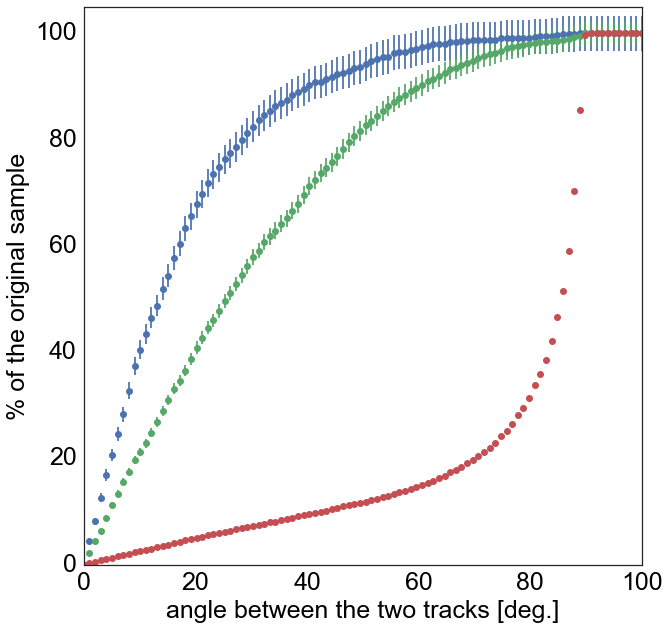

In [23]:
plot_cut_samples(cut_var ='2_tracks_angle',mul=180./np.pi,do_add_legend=False,
                 cut_type= 'symmetric',
                 x_label = 'angle between the two tracks [deg.]',
                 xcenter=90,
                 xmin=0., xmax=100 , Nbins=100)

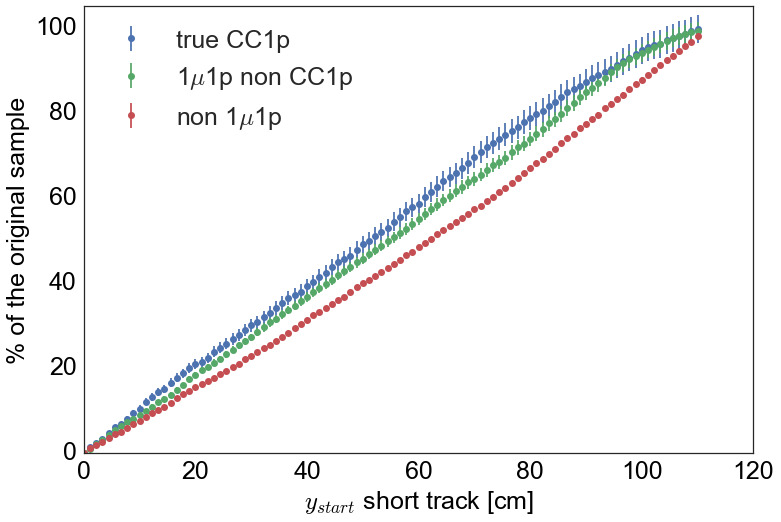

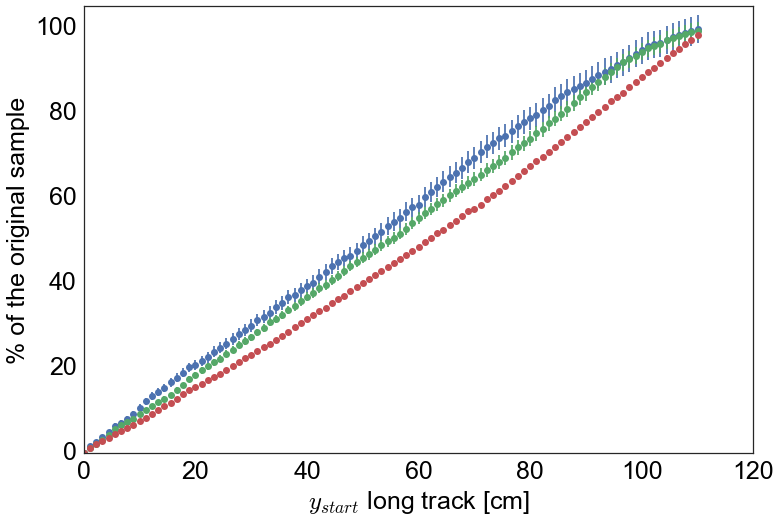

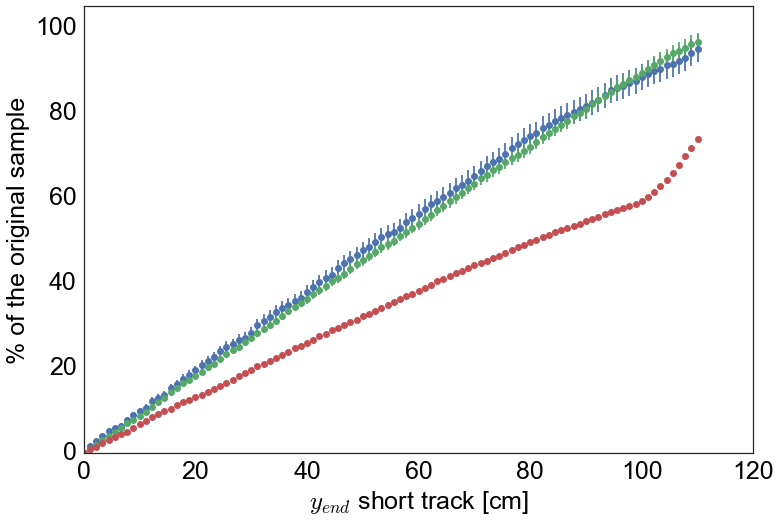

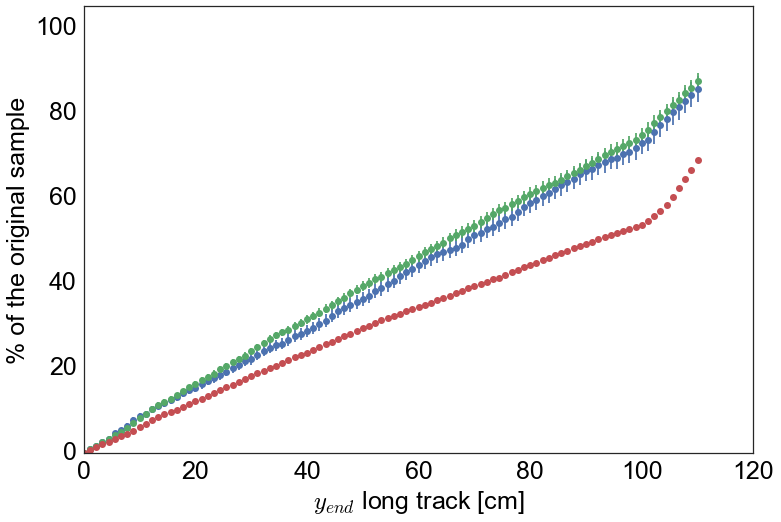

In [24]:
plot_cut_samples(cut_var ='starty_short',do_add_legend=True,figsize=(12,8),
                 cut_type= 'symmetric',
                 x_label = '$y_{start}$ short track [cm]',
                 xcenter=0,
                 xmin=0., xmax=110 , Nbins=100)

plot_cut_samples(cut_var ='starty_long',do_add_legend=False,figsize=(12,8),                
                 cut_type= 'symmetric',
                 x_label = '$y_{start}$ long track [cm]',
                 xcenter=0,
                 xmin=0., xmax=110 , Nbins=100)


plot_cut_samples(cut_var ='endy_short',do_add_legend=False,figsize=(12,8),           
                 cut_type= 'symmetric',
                 x_label = '$y_{end}$ short track [cm]',
                 xcenter=0,
                 xmin=0., xmax=110 , Nbins=100)

plot_cut_samples(cut_var ='endy_long',do_add_legend=False,figsize=(12,8),                
                 cut_type= 'symmetric',
                 x_label = '$y_{end}$ long track [cm]',
                 xcenter=0,
                 xmin=0., xmax=110 , Nbins=100)

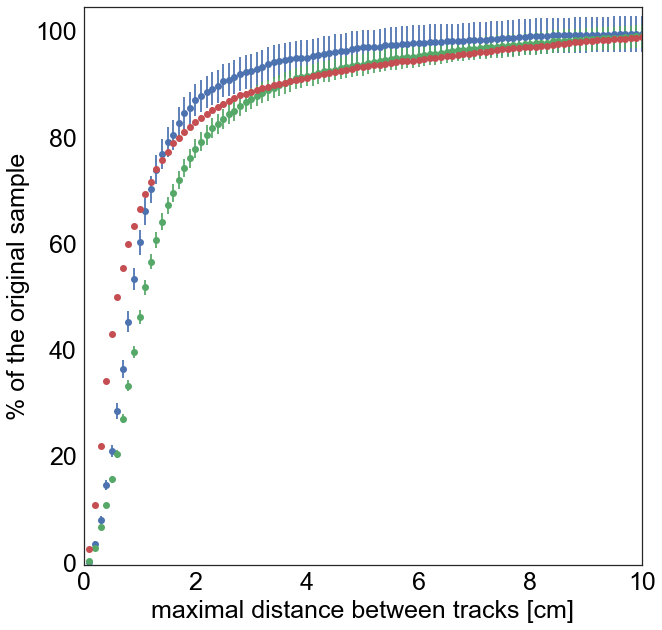

In [25]:
plot_cut_samples(cut_var ='distance',do_add_legend=False,
                 cut_type= 'max',                 
                 x_label = 'maximal distance between tracks [cm]',                 
                 xmin=0.1, xmax=10 , Nbins=100)

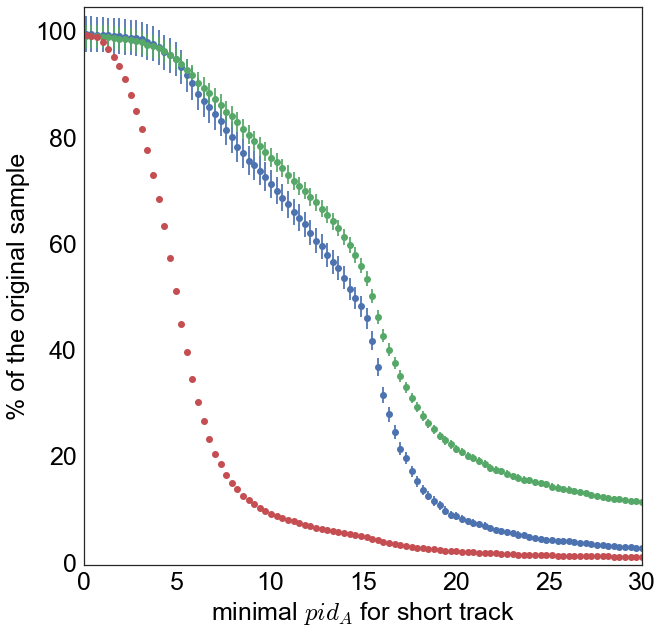

In [26]:
plot_cut_samples(cut_var ='PIDA_short', do_add_legend=False,               
                 cut_type= 'min',                 
                 x_label = 'minimal $pid_A$ for short track',                 
                 xmin=0.1, xmax=30 , Nbins=100)

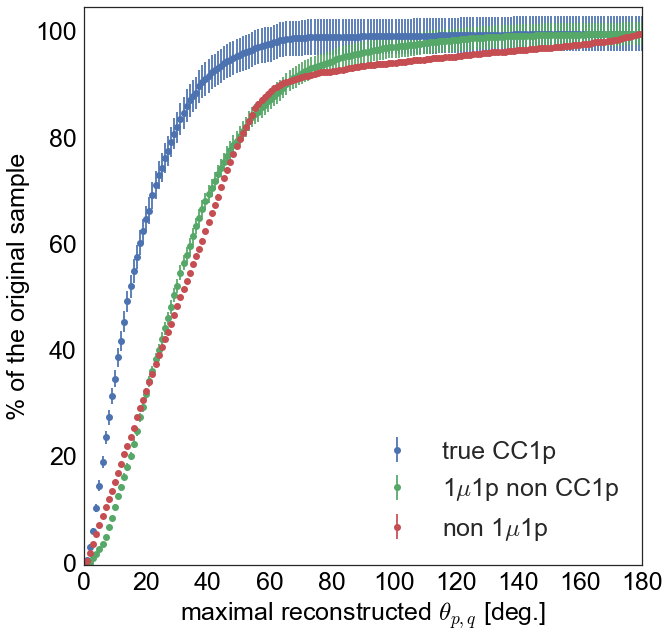

In [27]:
plot_cut_samples(cut_var ='reco_CC1p_theta_pq',                 
                 cut_type= 'max',                 
                 x_label = 'maximal reconstructed $\\theta_{p,q}$ [deg.]', 
                 xmin=0, xmax=180 , Nbins=180)

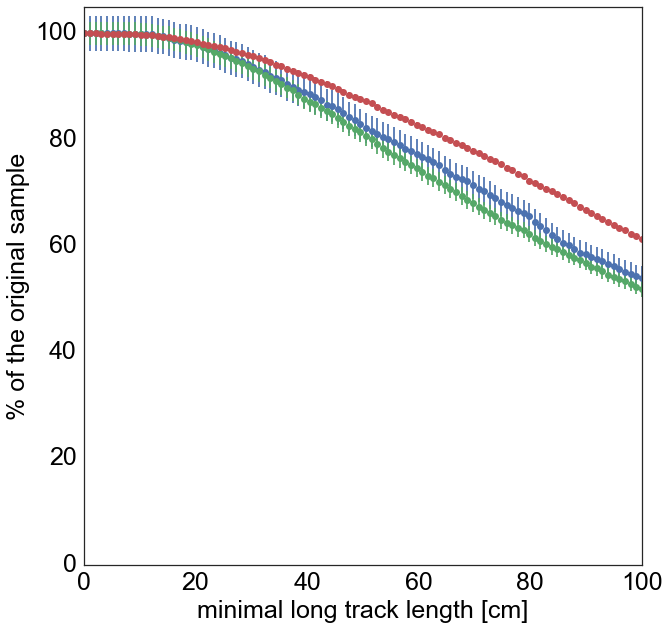

In [28]:
plot_cut_samples(cut_var ='l_long',do_add_legend=False,
                 cut_type= 'min',       
                 x_label = 'minimal long track length [cm]',                 
                 xmin=0.1, xmax=100 , Nbins=100)

In [2]:
GENIECC1p = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_GENIECC1p_MCC7_MC_BNB.csv',
                     converters={'track_id':generic,'distances':generic,'delta_phi':generic})
print len(GENIECC1p),'genie cc1p vertices'
recoGENIECC1p = GENIECC1p[GENIECC1p.IsVertexReconstructed==True]
print len(recoGENIECC1p),'fully reconstructed'

121541 genie cc1p vertices
8098 fully reconstructed


In [65]:
MCevents = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC7_MC_BNB.csv',
                     converters={'track_id':generic,'distances':generic,'delta_phi':generic})

print len(MCevents),'2-tracks clusters from MC-BNB events'
MCeventsTrueCC1p = MCevents[MCevents.GENIECC1p==1]
MCeventsNonTrueCC1p = MCevents[MCevents.GENIECC1p!=1]
print len(MCeventsTrueCC1p), 'are true (GENIE) cc1p'

82131 2-tracks clusters from MC-BNB events
7306 are true (GENIE) cc1p


In [66]:
extBNB2tracks = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC7_extBNB.csv',
                     converters={'track_id':generic,'distances':generic,'delta_phi':generic})

print len(extBNB2tracks),'extBNB 2-tracks clusters'

26876 extBNB 2-tracks clusters


In [67]:
OpenCosmic2tracks = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC7_openCOSMIC_MC.csv')
print len(OpenCosmic2tracks),'OpenCosmic 2-tracks clusters'

10395 OpenCosmic 2-tracks clusters


In [68]:
samples = [MCeventsTrueCC1p , MCeventsNonTrueCC1p , extBNB2tracks[0:40000], OpenCosmic2tracks]
labels = ['MC-BNB true(GENIE) CC1p' , 'MC-BNB non CC1p' , 'ext-BNB 2-tracks clusters', 'open-cosmic MC']

In [258]:
def sample_in_selected_cut( data=None, label='' ,do_print=False
                           ,FV_y_max = 110 # [cm]
                           ,delta_Delta_phi = 180 # around 180 [deg.]
                           ,theta_pq_min = 0 # [deg.]
                           ,delta_cfdistance = 200 # closest flash distance [cm]
                           ,delta_2_tracks_angle = 100 # angle between the two tracks
                           ,minimal_PIDA_large_pida=0
                           ,minimal_length_long = 0 # [cm]
                          ):
#     print 'FV_y_max, delta_Delta_phi, theta_pq_min, delta_2_tracks_angle , delta_cfdistance , minimal_PIDA_large_pida, minimal_length_long:\n',FV_y_max, delta_Delta_phi, theta_pq_min, delta_2_tracks_angle , delta_cfdistance , minimal_PIDA_large_pida, minimal_length_long


    reduced = data[     
    # cosmic supression
    # define a new FV cut
        (np.fabs(data['starty_short']) < FV_y_max)        
        & (np.fabs(data['starty_long']) < FV_y_max)
        & (np.fabs(data['endy_short']) < FV_y_max)        
        & (np.fabs(data['endy_long']) < FV_y_max)

        
    # match the closest flash
        & (np.fabs(data['cfdistance_long']) < delta_cfdistance)
        & (np.fabs(data['cfdistance_short']) < delta_cfdistance)


    # QE physics
    # cut on delta \phi for QE topology
        & (np.fabs(data['delta_phi']-180) < delta_Delta_phi)
        
    # cut on reconstructed \theta(p,q) - this comes only from physics
        & ( data['reco_CC1p_theta_pq'] > theta_pq_min )
        
        
    # now, things that may come from broken cosmic tracks 
        # angle between the two tracks
        & ( np.fabs(180./np.pi*data['2_tracks_angle']-90) < delta_2_tracks_angle )
        
        # pid-A of the short track
        & ( data['PIDA_large_pida'] > minimal_PIDA_large_pida )
        
        # length of the long track
        & ( data['l_long'] > minimal_length_long )        
    ]    
    
    frac = 100 * len(reduced) / len(data)
    frac_err = frac * np.sqrt( 1./len(reduced) + 1./len(data) ) if len(reduced)>0 else frac / np.sqrt(len(data))
    if do_print: print label,"retained %.1f +/- %.1f"%(frac,frac_err)+ "% in this cut"
    return reduced , frac , frac_err

In [148]:
reduced,frac,frac_err = [], [] , []
for sample,label in zip(samples,labels):
    r,f,f_err = sample_in_selected_cut( data=sample, label=label 
                                           ,FV_y_max=105 # [cm]
                                           ,delta_Delta_phi = 50. # around 180 [deg.]
                                           ,theta_pq_min = 150 # [deg.]
                                           ,delta_cfdistance = 120 # closest flash distance [cm]
                                           ,delta_2_tracks_angle = 20
                                           ,minimal_PIDA_large_pida=10
                                           ,minimal_length_long = 0 # [cm]
                                          )
    
    reduced.append(r)
    frac.append(f)
    frac_err.append(f_err)

MC-BNB true(GENIE) CC1p retained 35.0 +/- 0.8% in this cut
MC-BNB non CC1p retained 3.0 +/- 0.1% in this cut
ext-BNB 2-tracks clusters retained 0.0 +/- 0.0% in this cut
open-cosmic MC retained 0.0 +/- 0.0% in this cut


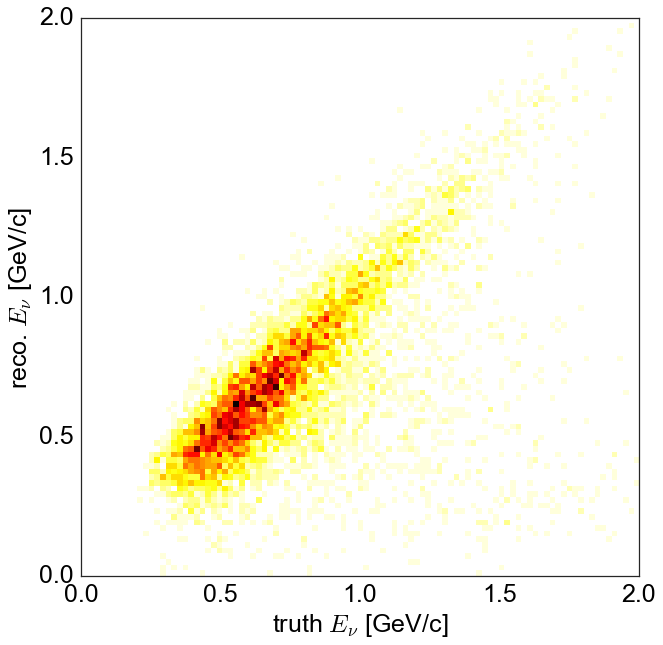

In [247]:
# fig= plt.figure(figsize=(20,20))
# ax=fig.add_subplot(2,2,1)
# plot_2d_hist(recoGENIECC1p.truth_Pmu , recoGENIECC1p.reco_CC1p_Pmu , bins=np.linspace(0,1.3,60) , xlabel='truth $p_{\\mu}$', ylabel='reco. $p_{\\mu}$',ax=ax);
# ax=fig.add_subplot(2,2,2)
# plot_2d_hist(recoGENIECC1p.truth_Pmu_x , recoGENIECC1p.reco_CC1p_Pmu_x , bins=np.linspace(-0.6,0.6,60), xlabel='truth $p_{\\mu}$-x', ylabel='reco. $p_{\\mu}$-x',ax=ax);
# ax=fig.add_subplot(2,2,3)
# plot_2d_hist(recoGENIECC1p.truth_Pmu_y , recoGENIECC1p.reco_CC1p_Pmu_y, bins=np.linspace(-0.6,0.6,60) , xlabel='truth $p_{\\mu}$-y', ylabel='reco. $p_{\\mu}$-y',ax=ax);
# ax=fig.add_subplot(2,2,4)
# plot_2d_hist(recoGENIECC1p.truth_Pmu_z , recoGENIECC1p.reco_CC1p_Pmu_z, bins=np.linspace(-0.3,1.2,60), xlabel='truth $p_{\\mu}$-z', ylabel='reco. $p_{\\mu}$-z',ax=ax);
# plt.tight_layout()
# fig= plt.figure(figsize=(20,20))
# ax=fig.add_subplot(2,2,1)
# plot_2d_hist(recoGENIECC1p.truth_Pp , recoGENIECC1p.reco_CC1p_Pp , bins=np.linspace(0,1.3,60) , xlabel='truth $p_{p}$', ylabel='reco. $p_{p}$',ax=ax,norm='non');
# ax=fig.add_subplot(2,2,2)
# plot_2d_hist(recoGENIECC1p.truth_Pp_x , recoGENIECC1p.reco_CC1p_Pp_x , bins=np.linspace(-0.8,0.8,60), xlabel='truth $p_{p}$-x', ylabel='reco. $p_{p}$-x',ax=ax,norm='non');
# ax=fig.add_subplot(2,2,3)
# plot_2d_hist(recoGENIECC1p.truth_Pp_y , recoGENIECC1p.reco_CC1p_Pp_y, bins=np.linspace(-0.8,0.8,60) , xlabel='truth $p_{p}$-y', ylabel='reco. $p_{p}$-y',ax=ax,norm='non');
# ax=fig.add_subplot(2,2,4)
# plot_2d_hist(recoGENIECC1p.truth_Pp_z , recoGENIECC1p.reco_CC1p_Pp_z, bins=np.linspace(-0.3,1.2,60), xlabel='truth $p_{p}$-z', ylabel='reco. $p_{p}$-z',ax=ax,norm='non' );
# plt.tight_layout()
# plot_2d_hist(recoGENIECC1p.truth_theta_pq , 180-recoGENIECC1p.reco_CC1p_theta_pq , xlabel='truth $\\theta_{p,q}$ [deg.]', ylabel='$\\pi-$ reco. $\\theta_{p,q}$ [deg.]');
plot_2d_hist(recoGENIECC1p.truth_Ev , recoGENIECC1p.reco_CC1p_Ev , bins=np.linspace(0,2,100), xlabel='truth $E_{\\nu}$ [GeV/c]', ylabel='reco. $E_{\\nu}$ [GeV/c]');

In [180]:

# plot_2d_hist(recoGENIECC1p.pdg_large_pida , recoGENIECC1p.pdg_small_pida);
# plot_2d_hist(recoGENIECC1p.l_small_pida , recoGENIECC1p.l_muon);
# plot_2d_hist(recoGENIECC1p.l_small_pida , recoGENIECC1p.l_muon);
# plot_2d_hist(MCeventsTrueCC1p.pdg_long,MCeventsTrueCC1p.pdg_short);
# plot_2d_hist(recoGENIECC1p.pdg_long,recoGENIECC1p.pdg_short,bins=(np.linspace(0,2220,2220),np.linspace(0,2220,2220)));
# recoGENIECC1p.plot.scatter('pdg_long','pdg_short')
# recoGENIECC1p.plot.scatter('truth_theta_pq','reco_CC1p_theta_pq')
# recoGENIECC1p.plot.scatter('l_long','pdg_long')
# recoGENIECC1p.plot.scatter('l_short','pdg_short')
# recoGENIECC1p.plot.scatter('l_large_pida','pdg_large_pida')
# recoGENIECC1p.plot.scatter('l_small_pida','pdg_small_pida')
# recoGENIECC1p.plot.hexbin('l_proton','l_short')
# recoGENIECC1p.plot.scatter('l_proton','l_short')
# recoGENIECC1p.plot.scatter('l_muon','l_short')
# plt.hist(recoGENIECC1p.l_long - recoGENIECC1p.l_short);
# plt.hist(recoGENIECC1p.l_small_pida - recoGENIECC1p.l_large_pida);
# plt.hist(recoGENIECC1p.PIDA_large_pida - recoGENIECC1p.PIDA_small_pida , bins=np.linspace(0,100,100) );
# plt.hist2d(recoGENIECC1p.PIDA_large_pida, recoGENIECC1p.l_large_pida , bins=np.linspace(0,100,100) );
# plt.hist2d(recoGENIECC1p.PIDA_small_pida, recoGENIECC1p.l_small_pida , bins=np.linspace(0,300,100) );
# plot_2d_hist(recoGENIECC1p.truth_P_muon , recoGENIECC1p.reco_CC1p_Pmu ,bins=np.linspace(0,1.5,50));
# plot_2d_hist(recoGENIECC1p.truth_P_proton , recoGENIECC1p.reco_CC1p_Pp ,bins=np.linspace(0,1.5,50));
# plot_2d_hist(recoGENIECC1p.truth_Ev , recoGENIECC1p.reco_CC1p_Ev );
# plot_2d_hist(recoGENIECC1p.truth_q , recoGENIECC1p.reco_CC1p_q );
# plot_2d_hist(recoGENIECC1p.truth_q_x , recoGENIECC1p.reco_CC1p_q_x );
# plot_2d_hist(recoGENIECC1p.truth_q_y , recoGENIECC1p.reco_CC1p_q_y );
# plot_2d_hist(recoGENIECC1p.truth_q_z , recoGENIECC1p.reco_CC1p_q_z );
# recoGENIECC1p.plot.scatter('truth_Pmu_y','reco_CC1p_Pmu_y')
# recoGENIECC1p[recoGENIECC1p.muon_track_is_flipped==1].plot.scatter('truth_Pmu_z','reco_CC1p_Pmu_z')
# recoGENIECC1p[recoGENIECC1p.muon_track_is_flipped==0].plot.scatter('truth_Pmu_z','reco_CC1p_Pmu_z')
# plot_2d_hist(recoGENIECC1p[recoGENIECC1p.muon_track_is_flipped==1].truth_Pmu_x , recoGENIECC1p[recoGENIECC1p.muon_track_is_flipped==1].reco_CC1p_Pmu_x );
# plot_2d_hist(recoGENIECC1p.truth_Pmu_y , recoGENIECC1p.reco_CC1p_Pmu_y );
# plot_2d_hist(recoGENIECC1p.truth_Pmu_z , recoGENIECC1p.reco_CC1p_Pmu_z );
# plot_2d_hist(recoGENIECC1p.truth_Pp_x , recoGENIECC1p.reco_CC1p_Pp_x );
# plot_2d_hist(recoGENIECC1p.truth_Pp_y , recoGENIECC1p.reco_CC1p_Pp_y );
# plot_2d_hist(recoGENIECC1p.truth_Pp_z , recoGENIECC1p.reco_CC1p_Pp_z );

# tests

In [50]:
MCevents = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC7_MC_BNB.csv',
                     converters={'track_id':generic,'distances':generic,'delta_phi':generic})

print len(MCevents),'2-tracks clusters from MC-BNB events'
MCeventsTrueCC1p = MCevents[MCevents.GENIECC1p==1]
print len(MCeventsTrueCC1p), 'are true (GENIE) cc1p'
MCeventsTrueCC1pAndTagged = MCeventsTrueCC1p[MCeventsTrueCC1p.l_large_pida < MCeventsTrueCC1p.l_small_pida]
print len(MCeventsTrueCC1pAndTagged), 'are true (GENIE) cc1p in which l(large-PID_A)<l(small-PID_A)'



MCeventsNonTrueCC1p = MCevents[MCevents.GENIECC1p!=1]
print len(MCeventsNonTrueCC1p), 'are non true (GENIE) cc1p'
MCeventsNonTrueCC1p1mu1p = MCevents[(MCevents.Is1mu1p==True) & (MCevents.GENIECC1p==False)]
MCeventsNon1mu1p = MCevents[MCevents.Is1mu1p==False]
print len(MCeventsNonTrueCC1p1mu1p), 'are 2-tracks clusters of 1µ1p'
print len(MCeventsNon1mu1p), 'are 2-tracks not 1µ1p'
print len(MCeventsNonTrueCC1p1mu1p) +  len(MCeventsNon1mu1p), ' 1µ1p and not 1µ1p together'

818 2-tracks clusters from MC-BNB events
58 are true (GENIE) cc1p
44 are true (GENIE) cc1p in which l(large-PID_A)<l(small-PID_A)
760 are non true (GENIE) cc1p
129 are 2-tracks clusters of 1µ1p
631 are 2-tracks not 1µ1p
760  1µ1p and not 1µ1p together


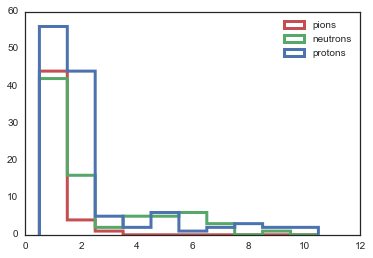

In [60]:
plt.hist([MCeventsNonTrueCC1p1mu1p.truth_Np,MCeventsNonTrueCC1p1mu1p.truth_Nn,MCeventsNonTrueCC1p1mu1p.truth_Npi],bins=np.linspace(0.5,10.5,11),histtype='step',linewidth=3,label=['protons','neutrons','pions']);
plt.legend()

In [31]:
samples = [MCeventsTrueCC1p , MCeventsNonTrueCC1p1mu1p, MCeventsNon1mu1p , MCeventsTrueCC1pAndTagged]
labels = ['MC-BNB true(GENIE) CC1p' , '1$\\mu$1p non CC1p' , 'non 1$\\mu$1p', 'true CC1p, $l_{large-PID_A}<l_{small-PID_A}$']

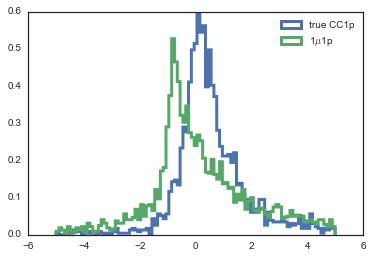

In [40]:
bins=np.linspace(-5,5,100)
# plt.hist(MCeventsTrueCC1p.reco_CC1p_q,bins=bins,histtype='step',linewidth=3);
# plt.hist(MCeventsNonTrueCC1p1mu1p.reco_CC1p_q**2-MCeventsNonTrueCC1p1mu1p.reco_CC1p_omega**2 - MCeventsNonTrueCC1p1mu1p.reco_CC1p_Xb,bins=bins,histtype='step',linewidth=3,normed=1,label='1$\\mu$1p');
# plt.hist(MCeventsTrueCC1pAndTagged.reco_CC1p_q**2-MCeventsTrueCC1pAndTagged.reco_CC1p_omega**2- MCeventsTrueCC1pAndTagged.reco_CC1p_Xb,bins=bins,histtype='step',linewidth=3,normed=1,label='true CC1p');
# plt.hist(MCeventsTrueCC1pAndTagged.reco_CC1p_omega,bins=bins,histtype='step',linewidth=3);
# plt.hist(MCeventsNonTrueCC1p1mu1p.reco_CC1p_omega,bins=bins,histtype='step',linewidth=3);
# plt.hist(MCeventsTrueCC1pAndTagged.truth_Ev,bins=bins,histtype='step',linewidth=3);
# plt.hist(MCeventsTrueCC1pAndTagged.reco_CC1p_Ev,bins=bins,histtype='step',linewidth=3);
# plt.hist(MCeventsNonTrueCC1p1mu1p.reco_CC1p_Ev,bins=bins,histtype='step',linewidth=3);
# plt.hist(MCeventsTrueCC1p.reco_CC1p_Xb,bins=bins,histtype='step',linewidth=3,normed=1);
# plt.hist(MCeventsNonTrueCC1p1mu1p.reco_CC1p_Xb,bins=bins,histtype='step',linewidth=3,normed=1);
# plt.hist(MCeventsTrueCC1p.truth_Xb,bins=bins,histtype='step',linewidth=3,normed=1);
# plt.hist(MCeventsTrueCC1pAndTagged.reco_CC1p_Xb,bins=bins,histtype='step',linewidth=3,normed=1);
# plot_2d_hist(MCeventsTrueCC1p.truth_q_x,MCeventsTrueCC1p.truth_Pp_x);
# plot_2d_hist(MCeventsTrueCC1pAndTagged.reco_CC1p_Pmu_x,MCeventsTrueCC1pAndTagged.reco_CC1p_Pp_x);
# plot_2d_hist(MCeventsNonTrueCC1p1mu1p.reco_CC1p_Pmu_x,MCeventsNonTrueCC1p1mu1p.reco_CC1p_Pp_x);
# plt.hist(MCeventsTrueCC1p.reco_CC1p_Pmu_x - MCeventsTrueCC1p.reco_CC1p_Pp_x,bins=bins,histtype='step',linewidth=3,normed=1);
# plt.hist(MCeventsTrueCC1pAndTagged.reco_CC1p_Pmu_z - MCeventsTrueCC1pAndTagged.reco_CC1p_Pp_z,bins=bins,histtype='step',linewidth=3,normed=1,label='true CC1p');
# plt.hist(MCeventsNonTrueCC1p1mu1p.reco_CC1p_Pmu_z - MCeventsNonTrueCC1p1mu1p.reco_CC1p_Pp_z,bins=bins,histtype='step',linewidth=3,normed=1,label='1$\\mu$1p');
# plt.hist(MCeventsTrueCC1p.reco_CC1p_Ev,histtype='step',linewidth=3);
# plt.hist(MCeventsTrueCC1p.reco_CC1p_Ev_from_angles,histtype='step',linewidth=3);
plt.hist(MCeventsTrueCC1p.reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff,histtype='step',bins=bins,linewidth=3,normed=1,label='true CC1p');
plt.hist(MCeventsNonTrueCC1p1mu1p.reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff,histtype='step',bins=bins,linewidth=3,normed=1,label='1$\\mu$1p');
plt.legend()
# print np.std(MCeventsTrueCC1pAndTagged.reco_CC1p_Pmu_x + MCeventsTrueCC1pAndTagged.reco_CC1p_Pp_x)

In [224]:
def correlations_in_major_samples(varx='reco_CC1p_p_over_q',vary='reco_CC1p_theta_pq',xlabel='reconstructed p/q',ylabel='reconstructed $\\theta_{p,q}$',bins=(np.linspace(0.5,2.5,50),np.linspace(0,60,60))):
    fig=plt.figure(figsize=(16,9))
    for i,sample,cmap in zip(range(len(samples)),samples,
                        ['Blues','Greens','Reds','Purples']):        
        ax=fig.add_subplot(2,2,i+1)
        plot_2d_hist(sample[varx],sample[vary],bins=bins,cmap=cmap,
                     xlabel=xlabel , ylabel=ylabel if i==1 or i==3 else '',ax=ax);
        if i==1 or i==3:     ax.yaxis.set_major_formatter( NullFormatter() )
        ax.grid(alpha=0.3)
        ax.set_title(labels[i],fontsize=20)
    plt.tight_layout()

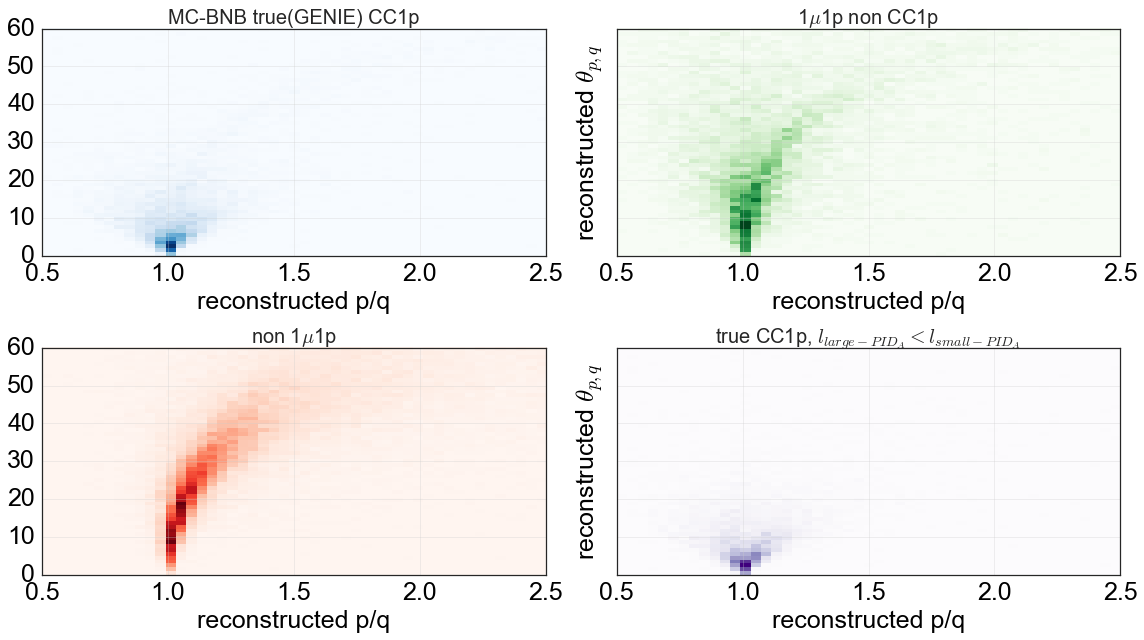

In [225]:
correlations_in_major_samples(varx='reco_CC1p_p_over_q',vary='reco_CC1p_theta_pq')

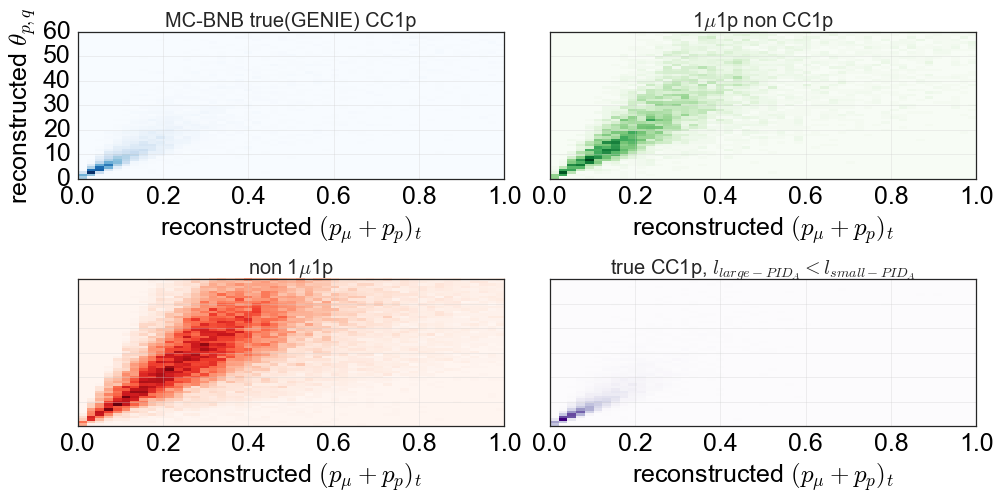

In [197]:
correlations_in_major_samples(varx='reco_CC1p_Pt',vary='reco_CC1p_theta_pq',
                              xlabel='reconstructed $(p_{\\mu}+p_{p})_t$',ylabel='reconstructed $\\theta_{p,q}$',                             
                              bins=(np.linspace(0.,1,50),np.linspace(0,60,60)))

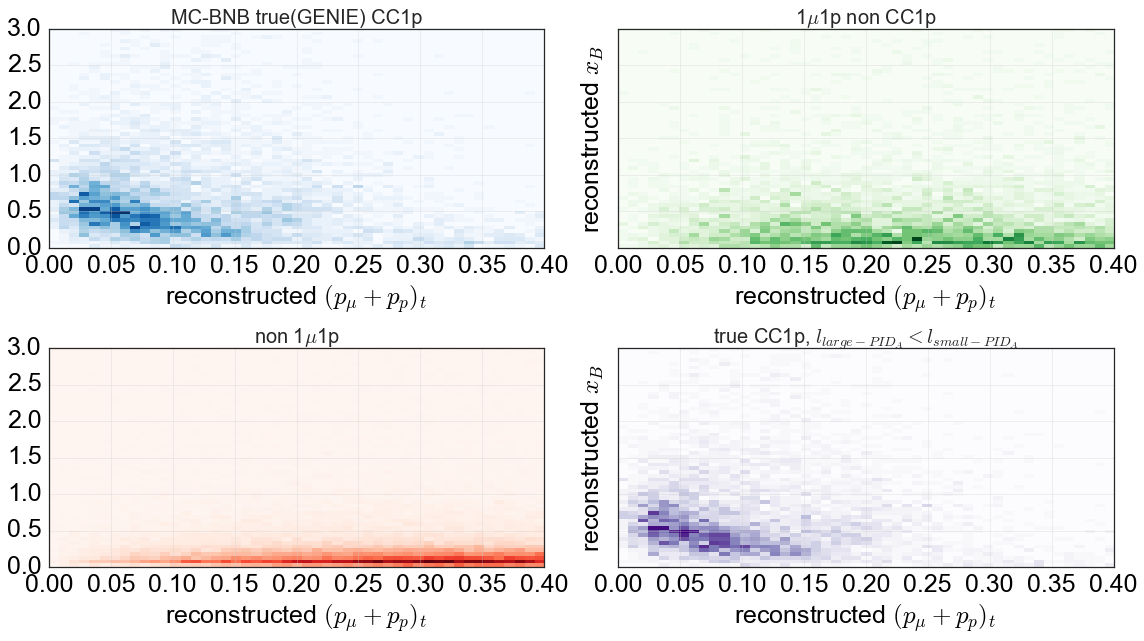

In [226]:
correlations_in_major_samples(varx='reco_CC1p_Pt',vary='reco_CC1p_Xb',
                              xlabel='reconstructed $(p_{\\mu}+p_{p})_t$',ylabel='reconstructed $x_B$',                             
                              bins=(np.linspace(0.,0.4,50),np.linspace(0,3,60)))

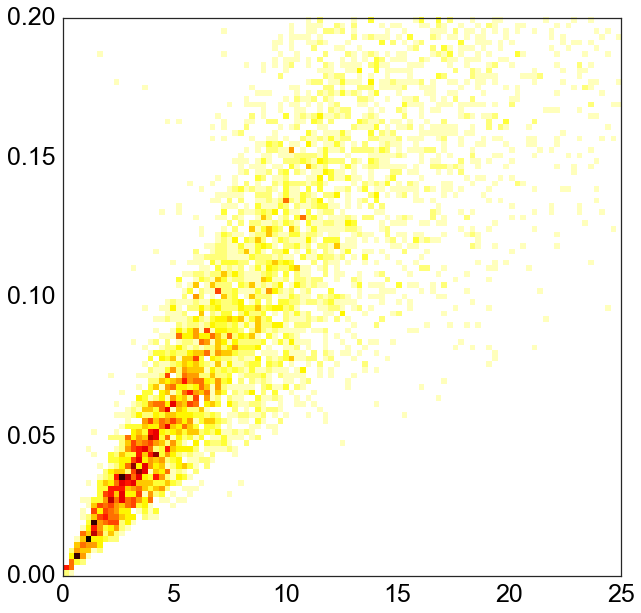

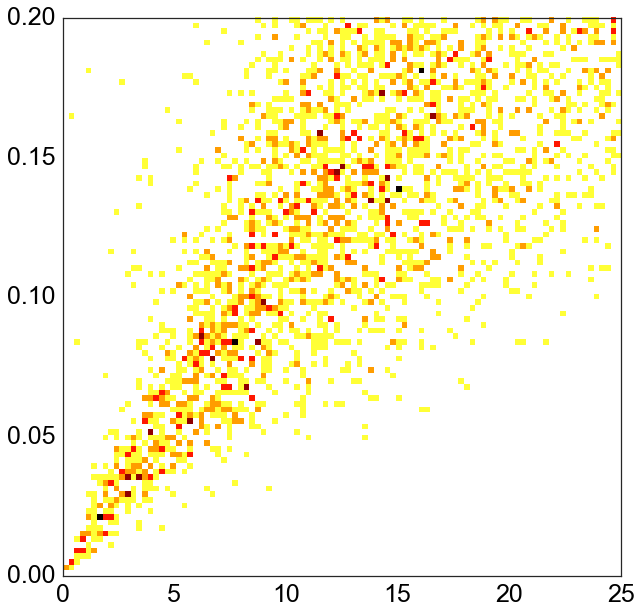

In [241]:
var , xmin, xmax = 'Xb' , -0.7 , 1.5
# sample = MCeventsTrueCC1p[MCeventsTrueCC1p.reco_CC1p_Xb<0.1]
# sample = MCeventsTrueCC1p[MCeventsTrueCC1p.reco_CC1p_Pmu<0.1]
sample = MCeventsTrueCC1p[MCeventsTrueCC1p.pdg_small_pida==2212]

# plot_2d_hist(sample['truth_'+var],sample['reco_CC1p_'+var],bins=np.linspace(xmin,xmax,100));
# plt.hist(sample.pdg_small_pida);
# plot_2d_hist(MCeventsTrueCC1p['reco_CC1p_Xb'] , (0.75-5*MCeventsTrueCC1p['reco_CC1p_Pt']),
#                                                  bins=np.linspace(xmin,xmax,100));
# plt.hist(MCeventsTrueCC1p['reco_CC1p_Xb'] - (0.75-5*MCeventsTrueCC1p['reco_CC1p_Pt']),bins=np.linspace(xmin,xmax,100));
plot_2d_hist(MCeventsTrueCC1p['reco_CC1p_theta_pq'] , MCeventsTrueCC1p['reco_CC1p_Pt'],bins=(np.linspace(0,25,100),np.linspace(0,0.2,100)));
plot_2d_hist(MCeventsNonTrueCC1p1mu1p['reco_CC1p_theta_pq'] , MCeventsNonTrueCC1p1mu1p['reco_CC1p_Pt'],bins=(np.linspace(0,25,100),np.linspace(0,0.2,100)));

In [ ]:
plot_2d_hist(sample['truth_'+var],sample['reco_CC1p_'+var],bins=np.linspace(xmin,xmax,100));

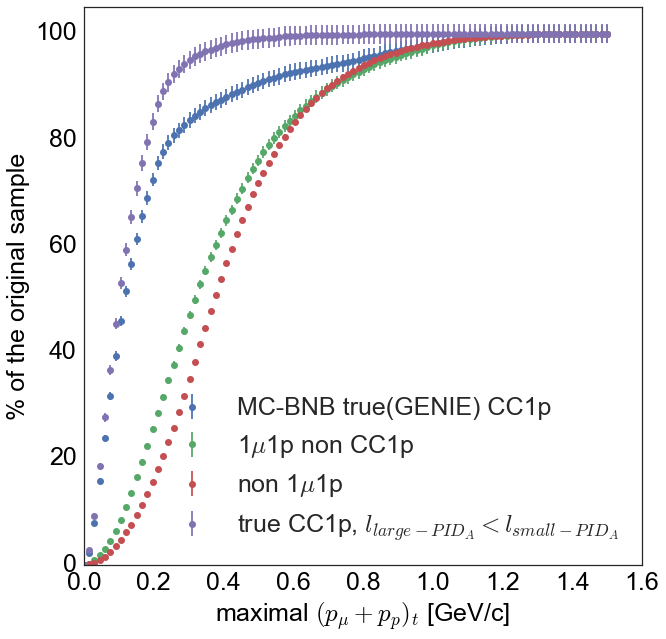

In [211]:
plot_cut_samples(cut_var ='reco_CC1p_Pt',do_add_legend=True,
                 cut_type= 'max',                 
                 x_label = 'maximal $(p_{\\mu}+p_{p})_t$ [GeV/c]',                 
                 xmin=0., xmax=1.5 , Nbins=100)

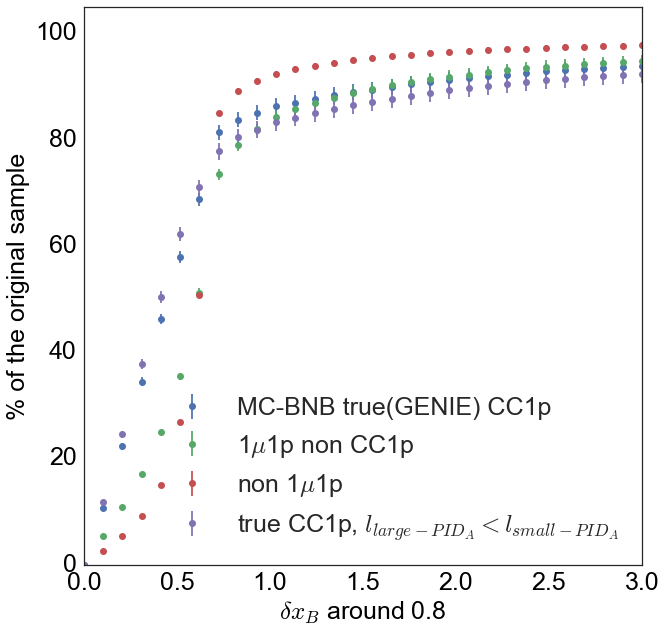

In [212]:
plot_cut_samples(cut_var ='reco_CC1p_Xb',do_add_legend=True,
                 cut_type= 'symmetric',
                 x_label = '$\\delta x_{B}$ around 0.8',
                 xcenter=0.73,
                 xmin=0., xmax=3 , Nbins=30)

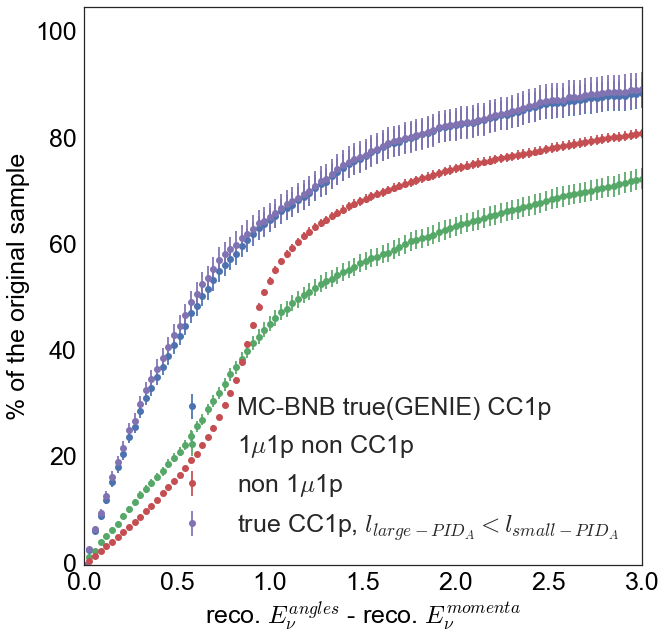

In [38]:
plot_cut_samples(cut_var ='reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff',do_add_legend=True,
                 cut_type= 'symmetric',
                 x_label = 'reco. $E_{\\nu}^{angles}$ - reco. $E_{\\nu}^{momenta}$',
                 xcenter=0,
                 xmin=0., xmax=3 , Nbins=100) 